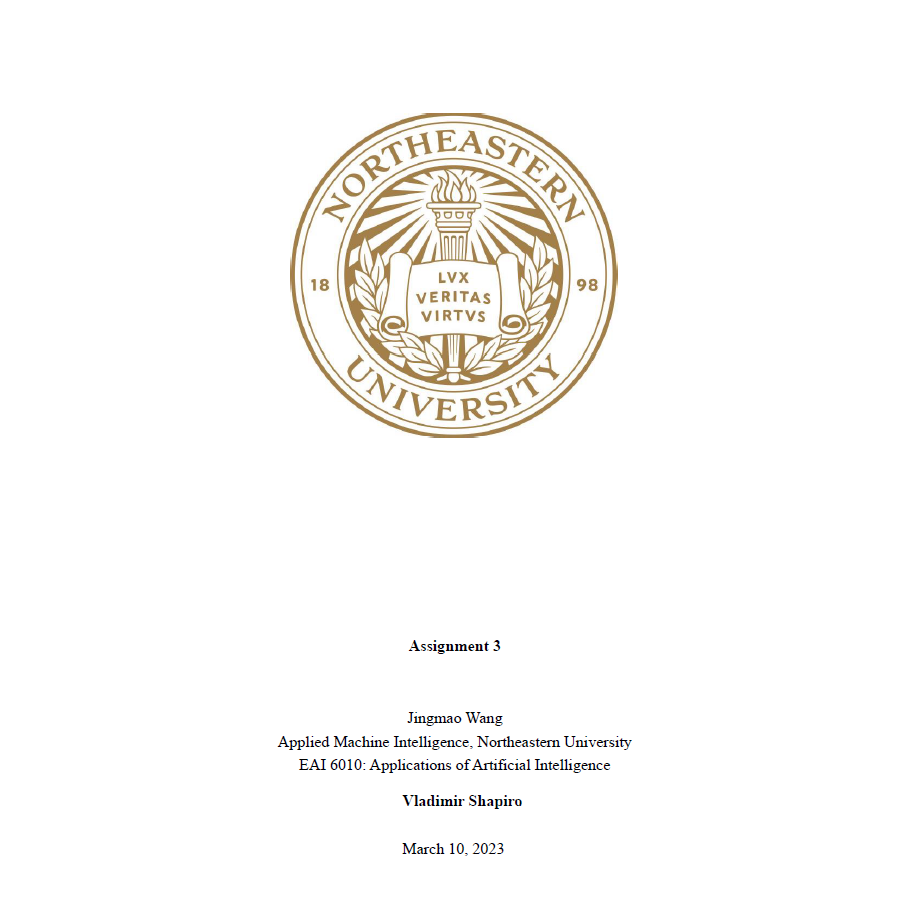

# Introduction

For this assignment, we will work with NLTK, the most commonly used library of natural language processing.
Using Gutenberg corpus and Inaugural corpus, explore relative frequencies, how to find frequently used words, and how to find synonyms and hyponyms.

# Analysis

Q1:  

A. Download and install the Gutenberg corpus tool to your Jupyter Notebook. Project 
Gutenberg contains some 25,000 free electronic books hosted at 
http://www.gutenberg.org/. We can install the NLTK package and use the Gutenberg 
corpus. You will install it by running the following in the computer terminal: 

B. Download the Gutenberg corpus tool in the NLTK package.

C. Use the texts in the corpus. 

D.  Create a table displaying relative frequencies with which “modals” (can, could, may, 
might, will, would, and should) appear in all texts provided in the corpus. 

E. For two modals with the largest span of relative (to the total number of modals) 
frequencies (most used minus least used), select a text which uses it the most and the 
text that uses it the least. Compare usage in both texts by examining the relative 
frequencies of those modals in the two texts. Try to explain why those words are used 
differently in the two texts. 











A1-A:  

First we will instill NLTK kage

In [119]:
pip install nltk   # download nltk  

Note: you may need to restart the kernel to use updated packages.


A1-B:   

we will download Gutenberg corpus.

In [120]:
import nltk   # import nltk
nltk.download('gutenberg') # download 'gutenberg'

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\91950\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

A1-C:

We will check the texts in the corpus and use it.

In [121]:
from nltk.corpus import gutenberg #import gutenberg
fileids = gutenberg.fileids()  # get the gutenberg text
fileids

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [122]:
Txt = gutenberg.raw('austen-emma.txt') #use the book 'austen-emma'
print(Txt[:1000]) # have a look 

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

A1-D:   

To calculate the relative frequency of ‘’modals”, we need to calculate every modal's frequency and divided it by the total word counts.

In [123]:
from nltk.corpus import gutenberg # import some libraries 
from tabulate import tabulate

data = {}  # define a dictionary to save each of modals and total number
modal_verbs = ['can', 'could', 'may', 'might', 'will', 'would', 'should'] # list of modals

for fileid in fileids:  # loop through each text in the corpus
    text = gutenberg.raw(fileid)  # load the text
    words = nltk.word_tokenize(text)  # tokenize the text into words
    fd = nltk.FreqDist(words) # create a frequency distribution of the words
    modal_verb_frequencies = {} # create a dictionary to hold the modal verb frequencies for this text
    for modal_verb in modal_verbs: # loop through each modal verb
        modal_verb_frequency_for_word = fd.freq(modal_verb)# calculate the frequency of the modal verb in the text 
        modal_verb_frequencies[modal_verb] = modal_verb_frequency_for_word# add the modal verb frequency to the dictionary
    data[fileid] = modal_verb_frequencies # add the modal verb frequencies for this text to the dictionary 
    
headers = ['Text'] + modal_verbs # create a list of headers for the table
table_data = [[fileid] + [data[fileid][verb] for verb in modal_verbs] for fileid in fileids]# create table data

print(tabulate(table_data, headers=headers))# show
print()
print('                                     Table 1:Relative frequencies with modals')

Text                             can        could          may        might         will        would       should
-----------------------  -----------  -----------  -----------  -----------  -----------  -----------  -----------
austen-emma.txt          0.00212217   0.00429648   0.00111062   0.00167375   0.00284172   0.00423912   0.00190839
austen-persuasion.txt    0.00145019   0.00453441   0.000888499  0.0016953    0.00156253   0.00358463   0.00188934
austen-sense.txt         0.00202297   0.00401766   0.00119539   0.00152077   0.00245445   0.00358618   0.00161272
bible-kjv.txt            0.000419302  0.000174269  0.00108152   0.000501684  0.00402086   0.000467886  0.000811143
blake-poems.txt          0.00291297   0.000364122  0.00060687   0.000242748  0.000364122  0.000364122  0.000728244
bryant-stories.txt       0.00149216   0.00302028   0.000323601  0.000413491  0.00258881   0.00199554   0.000683158
burgess-busterbrown.txt  0.00129436   0.00447632   0.000161795  0.000916837  0.0010

Table 1 displays relative frequencies with which “modals” (can, could, may, might, will, would, and should) appear in all texts provided in the Gutenberg corpus.

A1-E:  

This question was asked to calculate the relative(to the total number of modals) frequencies. So we need to change the formula to the number of each modal verb divided by the total modal verbs.

In [124]:
import pandas as pd # import pandas so that we can calcuate easily

def count_modal_verbs(text):# define function to count total modal verbs in ech text
    modal_verbs = ['can', 'could', 'may', 'might', 'will', 'would', 'should'] #modal list
    words = nltk.word_tokenize(text) #  split the text 
    fd = nltk.FreqDist(words) # counts the number of occurrences of each word in the text.
    count = sum(fd[word] for word in modal_verbs) # total number of modal 
    return count # return

modal_verbs = ['can', 'could', 'may', 'might', 'will', 'would', 'should'] # list of modal
fileids = nltk.corpus.gutenberg.fileids() #load corpus
data = [] # define a dictionary to save each of modals and total number

for fileid in fileids:# loop through each text in the corpus
    text = nltk.corpus.gutenberg.raw(fileid)  # load the text
    total_modal_verbs = count_modal_verbs(text) # create a frequency distribution of the words
    words = nltk.word_tokenize(text) # tokenize the text into words
    fd = nltk.FreqDist(words) # counts the number of occurrences of each word in the text.
    modal_verb_frequencies = {} # create a dictionary to hold the modal verb frequencies for this text
    for modal_verb in modal_verbs:  # loop through each modal verb
        modal_verb_frequency = fd[modal_verb] #save frequency of occurrence in the text
        modal_verb_frequency_rel = modal_verb_frequency / total_modal_verbs if total_modal_verbs > 0 else 0 # formula
        modal_verb_frequencies[modal_verb] = modal_verb_frequency_rel # added to a dictionary 
    modal_verb_frequencies["text"] = fileid.split(".")[0] #added to the dictionary under the key "text".
    data.append(modal_verb_frequencies) # add data


df = pd.DataFrame(data) #convert to dataframe
df = df[["text"] + modal_verbs] #define column 
df # show

,text,can,could,may,might,will,would,should
0,austen-emma,0.116652,0.236171,0.061049,0.092003,0.156205,0.233018,0.104901
1,austen-persuasion,0.092932,0.290576,0.056937,0.108639,0.100131,0.229712,0.121073
2,austen-sense,0.123276,0.244828,0.072845,0.092672,0.149569,0.218534,0.098276
3,bible-kjv,0.056081,0.023308,0.144653,0.067100,0.537788,0.062579,0.108490
4,blake-poems,0.521739,0.065217,0.108696,0.043478,0.065217,0.065217,0.130435
5,bryant-stories,0.141880,0.287179,0.030769,0.039316,0.246154,0.189744,0.064957
6,burgess-busterbrown,0.111628,0.386047,0.013953,0.079070,0.088372,0.260465,0.060465
7,carroll-alice,0.106529,0.281787,0.041237,0.096220,0.082474,0.281787,0.109966
8,chesterton-ball,0.155985,0.145103,0.110036,0.083434,0.239420,0.171705,0.094317
9,chesterton-brown,0.138075,0.256625,0.065551,0.099024,0.154812,0.198047,0.087866


    Table 2: Relative(to the total number of modals)) frequencies with modals

Table 2 is Relative(to the total number of modals) frequencies with modals. Next we will find the largest span of relative  frequencies.

In [125]:
# this line use lambda to find every column Max value minus min Value and sort by descending.
df.iloc[:, 1:].apply(lambda x: x.max() - x.min(), axis=0).sort_values(ascending=False)

will      0.472570
can       0.465658
could     0.362738
would     0.219207
may       0.161804
might     0.130467
should    0.119715
dtype: float64

we can see 'will' and 'can' has larger span than others.Next find those two specific text.

In [126]:
max_row_index_will = df['will'].idxmax() #find index of max value in column of will 
max_row_will= df.loc[max_row_index_will] # save text nname
min_row_index_will = df['will'].idxmin() #find index of min value in column of will 
min_row_will = df.loc[min_row_index_will]# save text name 
print(max_row_will[0]+' has max number of will')
print(min_row_will[0]+' has min number of will')

bible-kjv has max number of will
blake-poems has min number of will


have a look in bible-kjv and blake-poems

In [127]:
bible = nltk.Text(nltk.corpus.gutenberg.words('bible-kjv.txt')) # load text
bible.concordance('will') # have a look

Displaying 25 of 3836 matches:
ood that the man should be alone ; I will make him an help meet for him . 2 : 
 the days of thy life : 3 : 15 And I will put enmity between thee and the woma
 . 3 : 16 Unto the woman he said , I will greatly multiply thy sorrow and thy 
 heart . 6 : 7 And the LORD said , I will destroy man whom I have created from
ence through them ; and , behold , I will destroy them with the earth . 6 : 14
rth shall die . 6 : 18 But with thee will I establish my covenant ; and thou s
h . 7 : 4 For yet seven days , and I will cause it to rain upon the earth fort
ry living substance that I have made will I destroy from off the face of the e
; and the LORD said in his heart , I will not again curse the ground any more 
art is evil from his youth ; neither will I again smite any more every thing l
 And surely your blood of your lives will I require ; at the hand of every bea
require ; at the hand of every beast will I require it , and at the hand of ma
at the hand of every 

In [128]:
blake = nltk.Text(nltk.corpus.gutenberg.words('blake-poems.txt')) # load text
blake.concordance('will') # have a look

Displaying 3 of 3 matches:
arn ' d the heat to bear , The cloud will vanish , we shall hear His voice , S
lver hair , And be like him , and he will then love me . THE BLOSSOM Merry , m
alone nor or itself : fear not and I will call , The weak worm from its lowly 


 In the Bible, 'will' is used a lot, which may mean that the text shows a lot of desire or wishes.

 In the blake-poems, 'will' only use 3 times, which may mean that the 'will' word is not as important in poems

Do the same thing to 'can'

In [132]:
max_row_index_will = df['can'].idxmax() #find index of max value in column of can 
max_row_will= df.loc[max_row_index_will] # save text nname
min_row_index_will = df['can'].idxmin() #find index of min value in column of can
min_row_will = df.loc[min_row_index_will]# save text name 
print(max_row_will[0]+' has max number of can')
print(min_row_will[0]+' has min number of can')

blake-poems has max number of can
bible-kjv has min number of can


In [133]:
blake1 = nltk.Text(nltk.corpus.gutenberg.words('blake-poems.txt')) # load text
blake1.concordance('can') # have a look

Displaying 25 of 28 matches:
ill the little ones , weary , No more can be merry : The sun does descend , And
 ' ll shade him from the heat till he can bear To lean in joy upon our Father '
Sweet babe , in thy face Holy image I can trace ; Sweet babe , once like thee T
d now beside thee , bleating lamb , I can lie down and sleep , Or think on Him 
ie thee home !" ON ANOTHER ' S SORROW Can I see another ' s woe , And not be in
 ' s woe , And not be in sorrow too ? Can I see another ' s grief , And not see
rief , And not seek for kind relief ? Can I see a falling tear , And not feel m
 , And not feel my sorrow ' s share ? Can a father see his child Weep , nor be 
ld Weep , nor be with sorrow filled ? Can a mother sit and hear An infant groan
an , an infant fear ? No , no ! never can it be ! Never , never can it be ! And
 no ! never can it be ! Never , never can it be ! And can He who smiles on all 
it be ! Never , never can it be ! And can He who smiles on all Hear the wren wi
ng all our 

In [134]:
bible1 = nltk.Text(nltk.corpus.gutenberg.words('bible-kjv.txt')) # load text
bible1.concordance('can') # have a look

Displaying 25 of 235 matches:
ORD , My punishment is greater than I can bear . 4 : 14 Behold , thou hast driv
 dust of the earth : so that if a man can number the dust of the earth , then s
ll that thou seest is mine : and what can I do this day unto these my daughters
 because thou art his wife : how then can I do this great wickedness , and sin 
amed a dream , and there is none that can interpret it : and I have heard say o
 And Pharaoh said unto his servants , Can we find such a one as this is , a man
' s sacks with food , as much as they can carry , and put every man ' s money i
one ? wot ye not that such a man as I can certainly divine ? 44 : 16 And Judah 
e Levite thy brother ? I know that he can speak well . And also , behold , he c
5 : 11 Go ye , get you straw where ye can find it : yet not ought of your work 
 or of the young pigeons , such as he can get ; 14 : 31 Even such as he is able
koned among the nations . 23 : 10 Who can count the dust of Jacob , and the num
as he hath

In the Bible, 'can' is used a lot, which may reflect that the Bible is inspirin - always encourage more possibilities.

In the blake-poems, 'can' only use 28 times, which may mean that the 'can' word is not as important in poems

Q2:

A. In the Inaugural corpus, see below: 
 
B. Chose Kennedy’s speech, using.  
 
C. Identify the 10 most frequently used long words (words longer than 7 characters). 

D.  Which one of those 10 words has the largest number of synonyms? Use WordNet as a helper:  

E. List all synonyms for the 10 most frequently used words. Which one of those 10 words has the largest number of hyponyms? 

F. List all hyponyms of the 10 most frequently used words. 

G. Reflect on the results. 

H.  Run all the cells, ensure all are executed and create the output. It’s your choice 
whether to execute locally or on Google Colab.

A2-A: 

First we download Inaugural corpus.

In [135]:
nltk.download('inaugural') # download 'Inaugural'
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\91950\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


A2-B: 

Chose Kennedy’s speech.

In [136]:
nltk.corpus.inaugural.words('1961-Kennedy.txt') # LOAD corpus

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]

A2-C:  

We will identify the 10 most frequently used long words (words longer than 7 characters).    

In [137]:
corpus = nltk.corpus.inaugural.words('1961-Kennedy.txt') # define corpus

long_words = [word.lower() for word in corpus if len(word) > 7] # Get the words that length is greater than 7

freq_dist = nltk.FreqDist(long_words) # Get the frequency distribution of long words

top_10_words = freq_dist.most_common(10)# Get the top 10 most frequent long words
top_10_words

[('citizens', 5),
 ('president', 4),
 ('americans', 4),
 ('generation', 3),
 ('forebears', 2),
 ('revolution', 2),
 ('committed', 2),
 ('powerful', 2),
 ('supporting', 2),
 ('themselves', 2)]

A2-D:  

We will use wordnet to find which word has the largest number of stnonyms

In [138]:
from nltk.corpus import wordnet as wn # import wordnet
nltk.download('wordnet')

#defind a list contain top 10 words
words = ['citizens', 'president', 'americans', 'generation', 'forebears', 'revolution', 'committed', 'powerful', 'supporting', 'themselves']

most_synonyms_word = ''  # Initialize words with the most synonyms a
most_synonyms_count = 0  # Initialize the number of synonyms

for word in words:    # Loop through the list 
    synsets = wn.synsets(word)  # get syn synonyms 
    count = sum(len(synset.lemmas()) for synset in synsets) # count the number
    if count > most_synonyms_count:  # If the current word's total number of synonyms is greater than the maximum number.
        most_synonyms_count = count #update
        most_synonyms_word = word   #update

print(f"The word '{most_synonyms_word}' has the most synonyms with {most_synonyms_count} synonyms.") #print result


The word 'supporting' has the most synonyms with 52 synonyms.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91950\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


A2-E:    

we will list all synonyms for the 10 most frequently used words and find which one has the largest number of hyponyms. 

In [139]:
from nltk import FreqDist    # import FreqDist 
fdist10 = FreqDist(corpus)    # use FreqDist 
print(fdist10.most_common(10))# show the 10 most frequently used words

[(',', 85), ('the', 83), ('of', 65), ('.', 51), ('to', 38), ('and', 37), ('a', 29), ('we', 27), ('--', 25), ('in', 24)]


We have found the ten most common words,but these words are almost meaningless because they are so common,so we will deleate the stopwords and punctuation,then find the most common words again.

In [150]:
from nltk.corpus import stopwords  # import stopwords
import string                      # import string

stop_words = set(stopwords.words('english')) # set stop words as english
punctuation = set(string.punctuation)  #set punctuation

# Make all words lowercase and remove stopwords and punctuation
corpus_without_stopwords_or_punctuation = [word.lower() for word in corpus if word.lower() not in stop_words and word not in punctuation]

fdist10 = FreqDist(corpus_without_stopwords_or_punctuation) #get FreqDist 
print(fdist10.most_common(10)) # show the 10 most frequently used words again

[('--', 25), ('let', 16), ('us', 12), ('world', 8), ('sides', 8), ('new', 7), ('pledge', 7), ('citizens', 5), ('power', 5), ('shall', 5)]


Now we get the most common words, next we will find their synonyms.

In [155]:
tuples = fdist10.most_common(10)   #  the 10 most frequently used words 
word_list = [word for word, count in tuples]# Convert a tuple to a list
word_list 
def find_synonyms(words):   # defing a function to find stnonyms
    synonyms_dict = {}      # Initialization
    for word in word_list:     # loop 
        synsets = wn.synsets(word) # find synonyms
        synonyms = set()          # save synonyms
        for synset in synsets:   # loop 
            for lemma in synset.lemmas():
                synonyms.add(lemma.name()) # Add the synonyms of each word to the synonyms()
        synonyms_dict[word] = synonyms    # Add words and their synonym sets to the synonyms_dict
    return synonyms_dict                   # return Dic
find_synonyms(word_list)

{'--': set(),
 'let': {'Army_of_the_Pure',
  'Army_of_the_Righteous',
  'LET',
  'Lashkar-e-Taiba',
  'Lashkar-e-Tayyiba',
  'Lashkar-e-Toiba',
  'allow',
  'countenance',
  'get',
  'have',
  'lease',
  'let',
  'net_ball',
  'permit',
  'rent'},
 'us': {'America',
  'U',
  'U.S.',
  'U.S.A.',
  'US',
  'USA',
  'United_States',
  'United_States_of_America',
  'atomic_number_92',
  'the_States',
  'u',
  'uracil',
  'uranium'},
 'world': {'Earth',
  'cosmos',
  'creation',
  'domain',
  'earth',
  'earthly_concern',
  'existence',
  'global',
  'globe',
  'human_beings',
  'human_race',
  'humanity',
  'humankind',
  'humans',
  'macrocosm',
  'man',
  'mankind',
  'planetary',
  'populace',
  'public',
  'reality',
  'universe',
  'world',
  'world-wide',
  'worldly_concern',
  'worldwide'},
 'sides': {'English',
  'face',
  'incline',
  'position',
  'side',
  'side_of_meat',
  'slope'},
 'new': {'Modern',
  'New',
  'fresh',
  'freshly',
  'new',
  'newfangled',
  'newly',
  'novel

above are the most common  words and their synonyms. next we will find which one has largest number of hyponyms

In [156]:
for word in word_list:    #loop through each word in a list
    synsets = wn.synsets(word) # retrieves synsets using WordNet's synsets() function
    if synsets:
        synset = synsets[0]   # retrieves the first synset from the list of synsets.
        hyponyms = synset.hyponyms() # retrieve all of the synset's hyponyms
        
        if hyponyms:
            print(word, ':') 
            for hyponym in hyponyms:
                print('\t-', hyponym.name().split('.')[0]) # input hyponym's name
        else:
            print(word, ': no hyponyms found')
    else:
        print(word, ': no synsets found')

-- : no synsets found
let : no hyponyms found
us : no hyponyms found
world :
	- closed_universe
	- natural_order
	- nature
sides :
	- bedside
	- blind_side
	- dockside
	- east_side
	- hand
	- north_side
	- shipside
	- south_side
	- west_side
new : no hyponyms found
pledge :
	- pawn
citizens :
	- active_citizen
	- civilian
	- freeman
	- private_citizen
	- repatriate
	- thane
	- voter
power :
	- control
	- disposal
	- effectiveness
	- free_will
	- influence
	- interest
	- irresistibility
	- legal_power
	- persuasiveness
	- potency
	- preponderance
	- puissance
	- repellent
	- stranglehold
	- sway
	- valence
	- valence
	- veto
shall : no synsets found


we can see 'power' has the largest number of hyponyms.

A2-F:   

List all hyponyms of the 10 most frequently used words. 

In [157]:
for word in word_list:    #loop through each word in a list
    synsets = wn.synsets(word) # retrieves synsets using WordNet's synsets() function
    if synsets:
        synset = synsets[0]   # retrieves the first synset from the list of synsets.
        hyponyms = synset.hyponyms() # retrieve all of the synset's hyponyms
        
        if hyponyms:
            print(word, ':') 
            for hyponym in hyponyms:
                print('\t-', hyponym.name().split('.')[0]) # input hyponym's name
        else:
            print(word, ': no hyponyms found')
    else:
        print(word, ': no synsets found')

-- : no synsets found
let : no hyponyms found
us : no hyponyms found
world :
	- closed_universe
	- natural_order
	- nature
sides :
	- bedside
	- blind_side
	- dockside
	- east_side
	- hand
	- north_side
	- shipside
	- south_side
	- west_side
new : no hyponyms found
pledge :
	- pawn
citizens :
	- active_citizen
	- civilian
	- freeman
	- private_citizen
	- repatriate
	- thane
	- voter
power :
	- control
	- disposal
	- effectiveness
	- free_will
	- influence
	- interest
	- irresistibility
	- legal_power
	- persuasiveness
	- potency
	- preponderance
	- puissance
	- repellent
	- stranglehold
	- sway
	- valence
	- valence
	- veto
shall : no synsets found


Above list is all hyponyms of the 10 most frequently used words.

A2-G:    

For the words 'let','us',"new","--", and "shall", no hyponyms or synsets were found.Because these words are function words or auxiliary verbs that do not have many specific meanings or lexical associations.

Hyponyms are specific words that help us understand the meaning, scope, and relationship of a concept. Knowing a word's hyponyms words can provide detailed information about its attributes, features, and uses. This is crucial in understanding words and concepts in text, conversation, or tasks. Hyponyms can also help us organize knowledge and information, allowing us to create a classification system that helps retrieve, compare, and analyze different concepts and entities more effectively.

A2-H  

Run all the cells, ensure all are executed and create the output. 

# Conclusion

For this assignment, we worked with NLTK and Used Gutenberg corpus and Inaugural corpus, explore relative frequencies, how to find frequently used words, and how to find synonyms and hyponyms.These techniques are essential in natural language processing.

# References

Bird, S., Klein, E., &amp; Loper, E. (2009). Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit. O'Reilly